In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib
matplotlib.use('qt5agg')
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import matplotlib.gridspec as gridspec

In [3]:
def make_colorbar(composites):
    params = []
    # for comp in composites:
    # 	params.append(np.average(comp.dm15_array[comp.x1:comp.x2]))
    # norm = matplotlib.colors.Normalize(vmin=np.min(params),vmax=np.max(params))
    norm = matplotlib.colors.Normalize(vmin=1.,vmax=len(composites) + 1.)
    c_m = matplotlib.cm.plasma
    # c_m = matplotlib.cm.winter_r
    s_m = matplotlib.cm.ScalarMappable(cmap=c_m, norm=norm)
    s_m.set_array([])

    return s_m

In [4]:
def comparison_plot(composites):

#     plt.style.use('ggplot')
    colors = [color['color'] for color in list(plt.rcParams['axes.prop_cycle'])]
    h = [3,1,1,1,1,1,1]
    font = {'family' : 'serif',
        'color'  : 'black',
        'size'   : 25,
        }

#     gs = gridspec.GridSpec(7, 1, height_ratios=h, hspace = .001)
#     fig = plt.figure(num = 1, dpi = 100, figsize = [10,10])
    fig = plt.figure(num = 1, dpi = 100, figsize = [10,8])
    s_m = make_colorbar(composites)
    lw = 3

    composites, scales = composite.optimize_scales(composites, composites[0], True)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    i = 0
    k = 1
    for comp in composites:
        # param = np.average(comp.dm15_array[comp.x1:comp.x2])
        param = k

#         rel_flux = plt.subplot(gs[0])
        rel_flux = plt.subplot(111)
#         plt.setp(rel_flux.get_xticklabels(), visible=False)
        plt.ylabel('Relative Flux', fontdict = font)
#         rel_flux.axes.get_yaxis().set_ticks([])
        # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
        plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
        if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
            plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
                             comp.up_conf[comp.x1:comp.x2], color = s_m.to_rgba(param), alpha = 0.5)
            # plt.fill_between(comp.wavelength[comp.x1:comp.x2], comp.low_conf[comp.x1:comp.x2], 
            # 	             comp.up_conf[comp.x1:comp.x2], color = colors[i%len(colors)], alpha = 0.5)

#         var = plt.subplot(gs[1], sharex = rel_flux)
#         plt.setp(var.get_xticklabels(), visible=False)
#         plt.ylabel('Variance', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.ivar[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         res = plt.subplot(gs[2], sharex = rel_flux)
#         plt.setp(res.get_xticklabels(), visible=False)
#         plt.ylabel('Residuals', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))
#         if len(comp.low_conf) > 0 and len(comp.up_conf) > 0:
#             low_resid = comp.low_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             up_resid = comp.up_conf[comp.x1:comp.x2] - composites[0].flux[comp.x1:comp.x2]
#             plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = s_m.to_rgba(param), alpha = 0.5)
#             # plt.fill_between(comp.wavelength[comp.x1:comp.x2], low_resid, up_resid, color = colors[i%len(colors)], alpha = 0.5)

#         spec = plt.subplot(gs[3], sharex = rel_flux)
#         plt.setp(spec.get_xticklabels(), visible=False)
#         plt.ylabel('Spectra/Bin', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.spec_bin[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         phase = plt.subplot(gs[4], sharex = rel_flux)
#         plt.setp(phase.get_xticklabels(), visible=False)
#         plt.ylabel('Phase [d]', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.phase_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         delt = plt.subplot(gs[5], sharex = rel_flux)
#         plt.setp(delt.get_xticklabels(), visible=False)
#         plt.ylabel('$\Delta$m$_{15}$', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.dm15[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

#         plt.subplot(gs[6], sharex = rel_flux)
#         plt.ylabel('Redshift', fontdict = font)
#         # plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], color = s_m.to_rgba(param))
#         plt.plot(comp.wavelength[comp.x1:comp.x2], comp.red_array[comp.x1:comp.x2], linewidth = lw, color = s_m.to_rgba(param))

        i+=1
        k+=1

    plt.xlabel('Wavelength ' + "($\mathrm{\AA}$)", fontdict = font)
    # cb = plt.colorbar(s_m, ax = fig.axes)
    # cb.set_label('Phase', fontdict = font)
    # for ax in fig.axes:
    # 	ax.set_axis_bgcolor('white')

    plt.show()

In [5]:
def stacked_plot_max(composites,buff,label_buff):
    font1 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 20,
        }
    
    font2 = {'family' : 'serif',
        'color'  : 'black',
        'weight' : 'bold',
        'size'   : 10,
        }
    
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(15, 30, forward = True)
#     ax.get_yaxis().set_ticks([])
    ax.xaxis.set_tick_params(length=10, width = 2)
    plt.ylabel('Relative Flux + const.', fontdict = font1, fontsize = 40)
    plt.xlabel( 'Wavelength ' + "($\mathrm{\AA}$)", fontdict = font1, fontsize = 40)
    
    plt.rc('font', family='serif')
    plt.gca().set_yticklabels([])
    plt.minorticks_on()
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tick_params(
        which='major', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=10)
    plt.tick_params(
        which='minor', 
        bottom='on', 
        top='on',
        left='on',
        right='on',
        length=5)
    
    composites, scales = composite.optimize_scales(composites, composites[0], True)

    i = 0
    for comp in composites:
        dm15 = np.average(comp.dm15_array[comp.x1:comp.x2])
#         ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - 1200*dm15, color = '#3F5D7D', linewidth = 4)
        ax.plot(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.flux[comp.x1:comp.x2] - buff*i, color = '#3F5D7D', linewidth = 4)
        plt.fill_between(comp.wavelength[comp.x1:comp.x2], 2.e15*comp.low_conf[comp.x1:comp.x2]- buff*i, 2.e15*comp.up_conf[comp.x1:comp.x2] - buff*i, alpha = 0.5)
#         plt.text(9700, comp.flux[comp.x2] - 1200*dm15 + 30, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font1)
        plt.text(8000, comp.flux[comp.x2] - buff*i +label_buff, '$\mathbf{\Delta m_{15}}$ = ' + str(round(dm15, 2)), fontdict = font2, fontsize = 30)
        i += 1
#     plt.title('Maximum Light Composite Spectra \n for Different Light Curve Shapes', fontdict = font1, fontsize = 40)
    plt.xlim([3000,10500])
#     plt.savefig('../../FOE_figures/dm15_split_max.png', dpi = 300, bbox_inches = 'tight')
#     plt.savefig('host_lowdm15_p1week.pdf', dpi = 300, bbox_inches = 'tight')
    plt.show()

# Max-No dm15 Match

In [6]:
%matplotlib inline

In [7]:
# query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 14 and 18",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 13",
#                   "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]
query_host_max = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18",
                  "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9"]

In [8]:
comps_host_max, sn_arrays_host_max, boot_sn_arrays_host_max = query_db.main(len(query_host_max), query_host_max, boot='b', medmean=1, selection = 'max_coverage')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18
154 questionable files currently ignored
103 spectra found
154 questionable files currently ignored
9 questionable spectra removed 94 spectra left
3 Peculiar Ias removed 91 spectra left
66 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
1 spectra with nan ivars removed 65 spectra left
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 1.11 bsnip 49519.338 3124.0 11082.0 11.0
Host correction...
1995e sn1995e-19950224-uoi2.flm 44.325356664 1.16 None -2.46 bsnip 49772.314 3136.0 11162.0 12.0
Host correction...
1996ai sn1996ai-19960622-uoi.flm 46.9712987061 0.88 None 1.231 bsnip 50256.331 3202.0 10368.0 13.0
Host correction...
1997y sn1997y-19970209-uohp.flm 44.230493937 1.15 None 1.27 bsnip 50488.351 3202.0 9716.0 12.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.54 

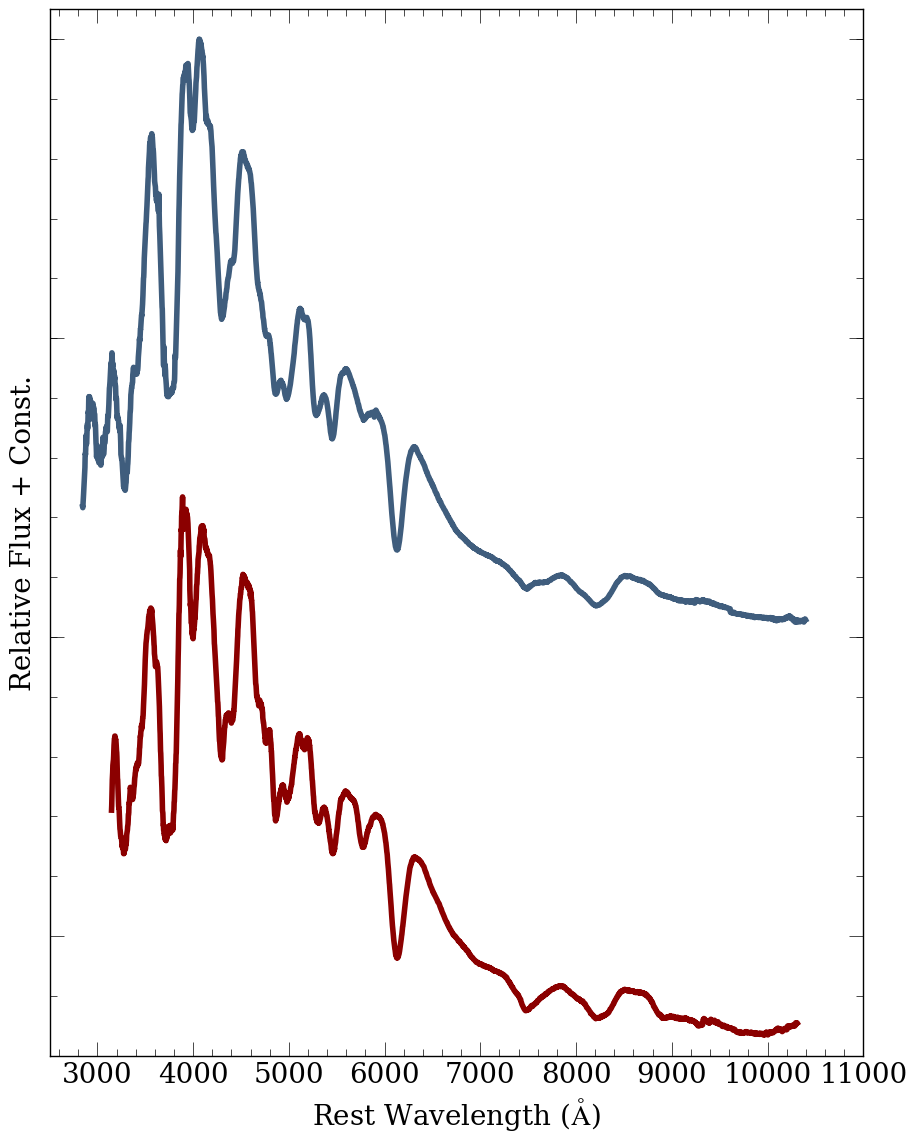

In [34]:
query_db.set_min_num_spec(comps_host_max, 5)
# comparison_plot(comps_host_max)
# query_db.comparison_plot(comps_host_max, scale_type=True)
# query_db.comparison_plot(comps_host_max, scale_type=False, min_num_show=2)
# stacked_plot_max(comps_host_max,5,1)
query_db.stacked_plot(comps_host_max)

# Max-Low dm15 Matched

In [9]:
query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source < 1.1 or dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15)) and filename != 'sn2002bf-20020307-os.flm'"]
# query_host_low_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology >= 7 and ((dm15_cfa < 1.1 or dm15_from_fits < 1.1))",
#                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and morphology between 1 and 7 and ((dm15_cfa < 1.15 or dm15_from_fits < 1.15))"]

In [10]:
comps_host_low_dm15, sn_arrays_low_dm15, boot_sn_arrays_low_dm15 = query_db.main(len(query_host_low_dm15), query_host_low_dm15, boot='b', medmean=1, selection='max_coverage_choose_uv')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source < 1.1 or dm15_from_fits < 1.1))
154 questionable files currently ignored
51 spectra found
154 questionable files currently ignored
3 questionable spectra removed 48 spectra left
0 Peculiar Ias removed 48 spectra left
42 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
1 spectra with nan ivars removed 41 spectra left
1994s sn1994s-19940616-uoi.flm 34.8971198257 0.94 None 1.11 bsnip 49519.338 3124.0 11082.0 11.0
Host correction...
1996ai sn1996ai-19960622-uoi.flm 46.9712987061 0.88 None 1.231 bsnip 50256.331 3202.0 10368.0 13.0
Host correction...
1998dk sn1998dk-19980831-ui.flm 70.6132013702 1.05 None -0.54 bsnip 51056.305 3308.0 10018.0 14.0
Host correction...
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.24 bsnip 51232.237 3344.0 10350.0 14.0
Host correction...
1999dq sn1

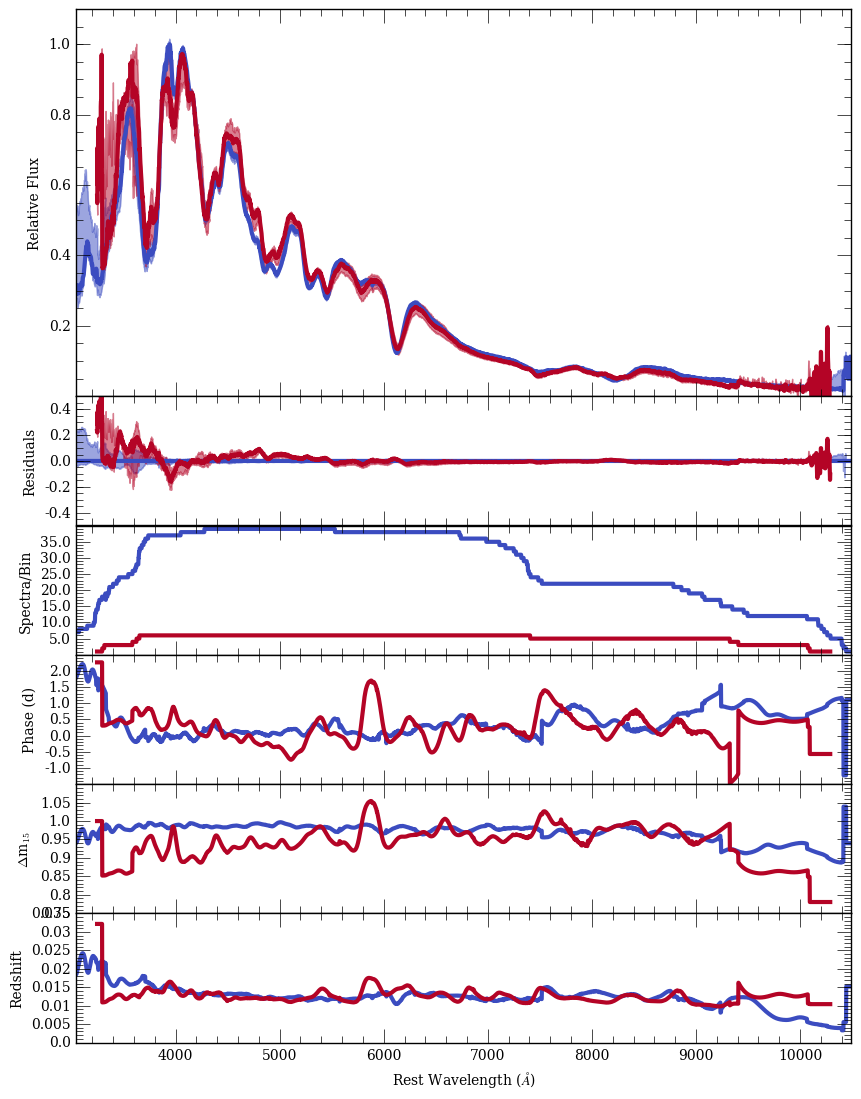

In [36]:
# composite.optimize_scales(comps_host_low_dm15, comps_host_low_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15, 1)
# query_db.comparison_plot(comps_host_low_dm15, scale_type= True)
query_db.comparison_plot(comps_host_low_dm15, scale_type= False, min_num_show=1)

# Max-High dm15 Matched

In [49]:
# query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.15 and dm15_source < 1.9) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.9))",
#                         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.15 and dm15_source < 1.5) or (dm15_from_fits > 1.15 and dm15_from_fits < 1.5)) and Supernovae.SN != '2008ia'"]
query_host_high_dm15 = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.9) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.9))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 1 and 9 and ((dm15_source > 1.2 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45))"]

In [50]:
comps_host_high_dm15, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15), query_host_high_dm15, boot='b', medmean=1, selection='max_coverage_choose_uv')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= -3 and phase <= 3 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.9) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.9))
154 questionable files currently ignored
18 spectra found
154 questionable files currently ignored
3 questionable spectra removed 15 spectra left
2 Peculiar Ias removed 13 spectra left
8 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
1 spectra with nan ivars removed 7 spectra left
2001ep sn2001ep-20011020-ui-corrected.flm 50.8449098727 1.3 None 2.83 bsnip 52202.47 3308.0 10216.0 12.0
Host correction...
2003u sn2003U-20030204-ui.flm 29.2694201484 1.46 None -2.55 bsnip 52674.552 3068.0 10064.0 15.0
Host correction...
1999cc sn1999cc-19990516.34-fast.flm 23.2075050712 1.35 None -1.26 cfa 51314.34 3658.0 7262.0 14.0
Host correction...
2005am sn2005am-20050303.30-fast.flm 28.1181574341 1.3 None -3.0 cfa 5

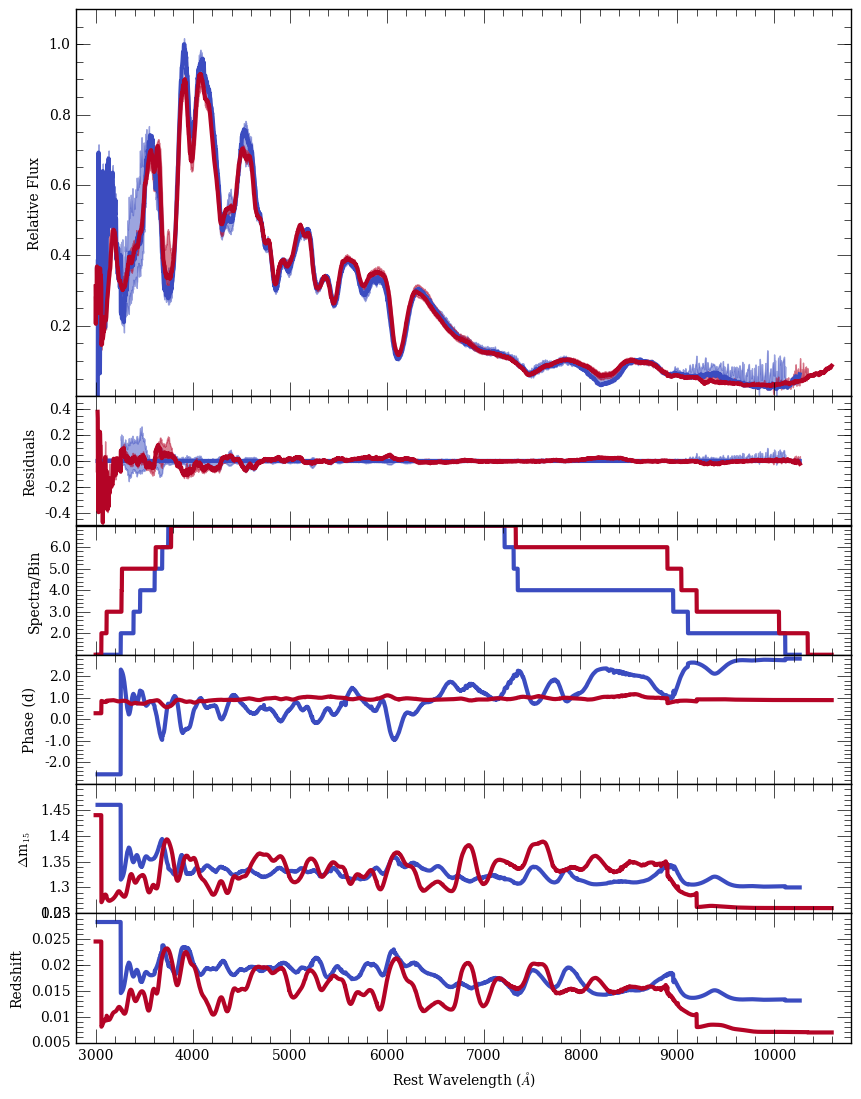

In [51]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15, scale_type=False, min_num_show=1, min_num_scale=5)

# +1 Week-Low dm15 Matched

In [13]:
query_host_low_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))",
                       "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source < 1.15 or dm15_from_fits < 1.15))"]

In [14]:
comps_host_low_dm15_p1week, sn_arrays_low_dm15_p1week, boot_sn_arrays_low_dm15_p1week = query_db.main(len(query_host_low_dm15_p1week), query_host_low_dm15_p1week, boot='b', medmean=1, selection='max_coverage_choose_uv')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 8 and NED_host between 10 and 18 and ((dm15_source > .95 and dm15_source < 1.1) or (dm15_from_fits > .95 and dm15_from_fits < 1.1))
154 questionable files currently ignored
24 spectra found
154 questionable files currently ignored
1 questionable spectra removed 23 spectra left
0 Peculiar Ias removed 23 spectra left
21 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
0 spectra with nan ivars removed 21 spectra left
1989b sn1989b-19890215.flm 63.617575217 None 1.09678395966 7.54 bsnip 47572.0 3492.0 8380.0 12.0
Host correction...
1998v sn1998v-19980326-br.flm 83.5622224849 0.99 None 7.2 bsnip 50898.638 3834.0 8992.0 12.0
Host correction...
2006cf sn2006cf-20060523.291-ui.flm 6.46920039592 None 1.04621465431 6.28 bsnip 53878.291 3238.0 10032.0 15.0
Host correction...
2006cm sn2006cm-20060605.470-ui.flm 18.6360132836 1.04 None 6.77 bsnip 

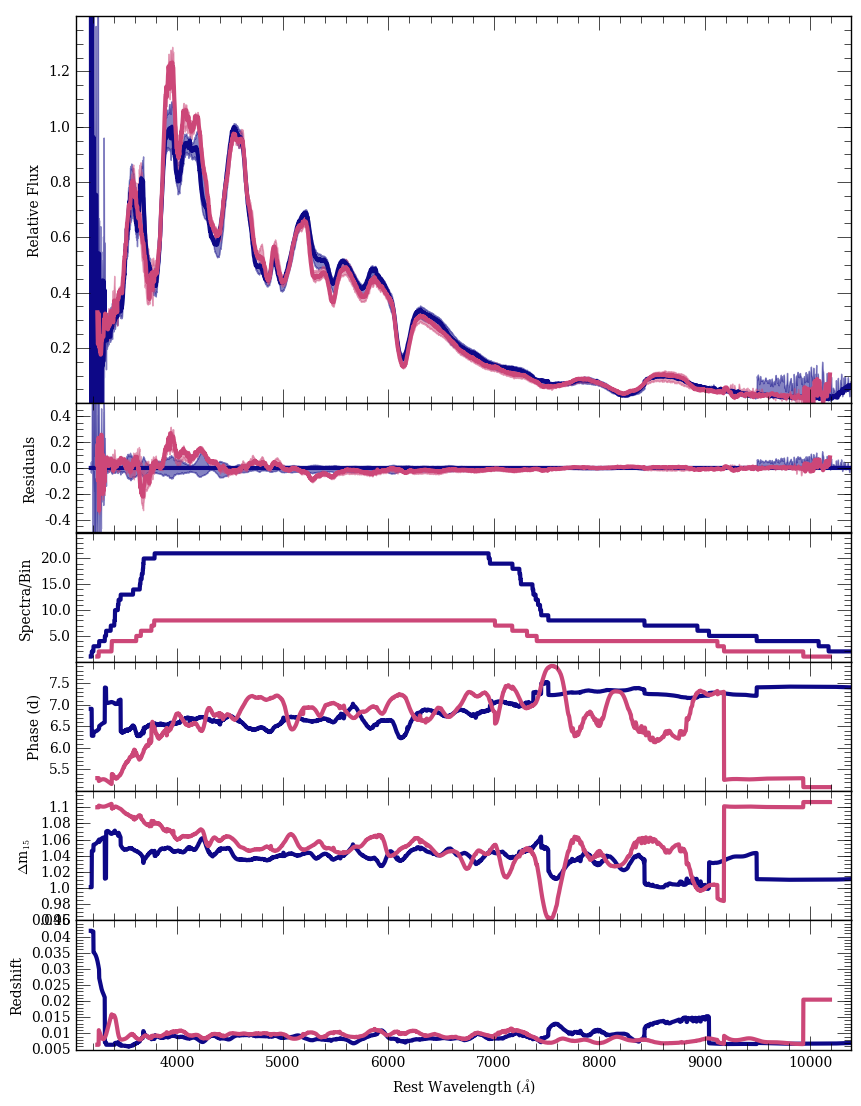

In [185]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_low_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_low_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5)

# +1 Week-High dm15 Matched

In [15]:
query_host_high_dm15_p1week = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))",
                        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 1 and 9 and ((dm15_source > 1.3 and dm15_source < 1.45) or (dm15_from_fits > 1.3 and dm15_from_fits < 1.45)) and Supernovae.SN != '2008ia'"]

In [16]:
comps_host_high_dm15_p1week, sn_arrays_high_dm15, boot_sn_arrays_high_dm15 = query_db.main(len(query_host_high_dm15_p1week), query_host_high_dm15_p1week, boot='b', medmean=1, selection='max_coverage_choose_uv')

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where phase >= 5 and phase <= 9 and NED_host between 10 and 18 and ((dm15_source > 1.25 and dm15_source < 1.8) or (dm15_from_fits > 1.25 and dm15_from_fits < 1.8))
154 questionable files currently ignored
16 spectra found
154 questionable files currently ignored
1 questionable spectra removed 15 spectra left
0 Peculiar Ias removed 15 spectra left
10 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
0 spectra with nan ivars removed 10 spectra left
2001ep sn2001ep-20011025-ui-corrected.flm 37.8659769534 1.3 None 7.85 bsnip 52207.556 3288.0 10216.0 12.0
Host correction...
2004ef sn2004ef-20040924.302-ui-corrected.flm 10.2041329015 1.39 None 8.05 bsnip 53272.302 3272.0 10136.0 12.0
Host correction...
2005am SN05am_050315_b01_DUP_WF.dat 53.5285585206 1.3 None 7.98999999976 csp 53444.09 3822.0 9114.0 10.0
Host correction...
2006ob sn2006ob-20061201.107-ui.flm 3.495541977

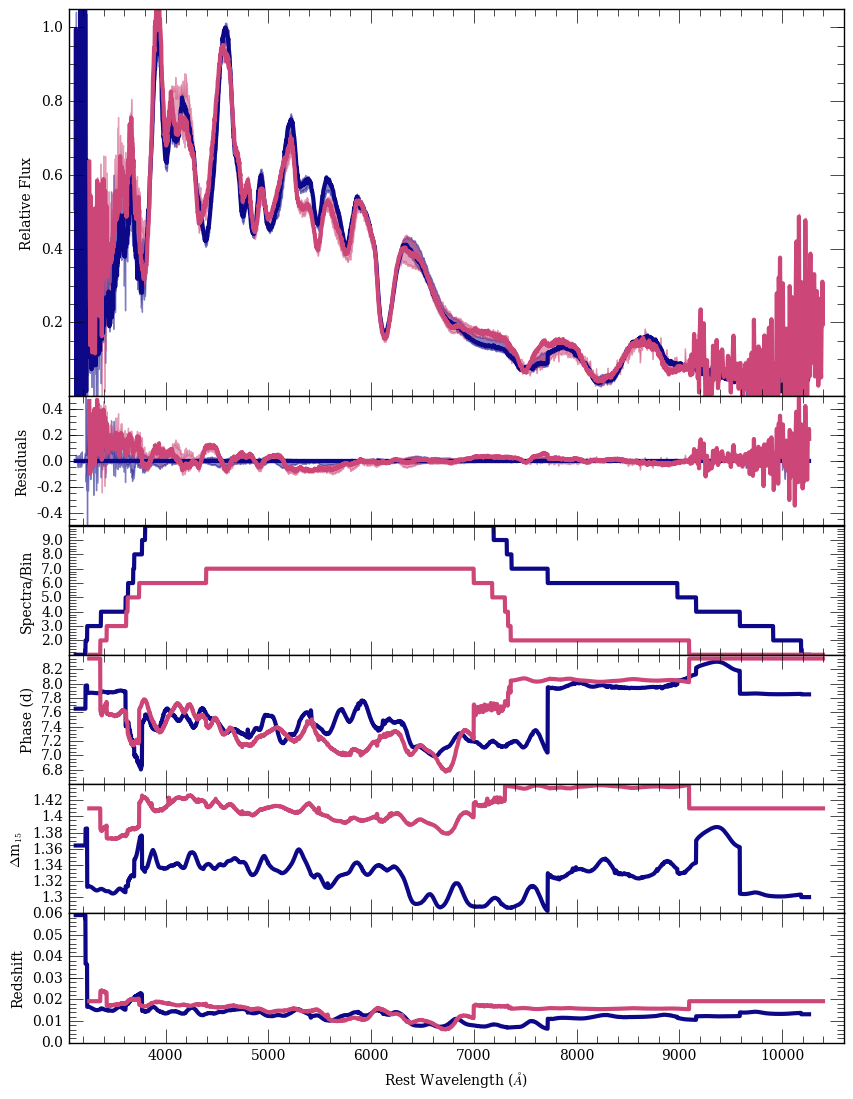

In [157]:
# composite.optimize_scales(comps_host_high_dm15, comps_host_high_dm15[0], True)
query_db.set_min_num_spec(comps_host_high_dm15_p1week, 1)
# query_db.comparison_plot(comps_host_high_dm15, scale_type=True)
query_db.comparison_plot(comps_host_high_dm15_p1week, scale_type=False, min_num_show=1, min_num_scale=5)